# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[70, 65, 70, ..., 40, 83, 96],
       [52, 59, 47, ..., 85, 73, 40],
       [28, 56, 58, ..., 85,  0, 19],
       ...,
       [16, 16,  7, ..., 57, 82,  5],
       [23, 82, 66, ..., 24, 17, 62],
       [43, 54, 35, ..., 73, 72, 13]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
new_order = list(range(A.shape[1]))
np.random.shuffle(new_order)
res=A[:, new_order]
res

array([[30, 46, 91, ..., 70, 20, 46],
       [30, 89, 23, ..., 47, 87, 54],
       [ 9, 11, 41, ..., 58, 74, 10],
       ...,
       [28, 55, 35, ...,  7, 23, 87],
       [61, 92, 11, ..., 66, 67, 70],
       [42, 78, 41, ..., 35, 43, 97]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [4]:
odd_sum_mean = A[:, 1::2].sum(axis=0).mean()
even = A[:, ::2].sum(axis=1)
A[even > odd_sum_mean, :]

array([], shape=(0, 50), dtype=int32)

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [5]:
diff = np.max(A, axis=1) - np.min(A, axis=1)
np.argmax(diff)

0

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [6]:
np.argsort(np.argsort(A.flatten())).reshape(A.shape) + np.ones(A.shape)

array([[7076., 6632., 7043., ..., 4095., 8305., 9665.],
       [5285., 6102., 4886., ..., 8570., 7343., 4126.],
       [2889., 5734., 5943., ..., 8574.,   37., 1896.],
       ...,
       [1635., 1625.,  708., ..., 5847., 8230.,  499.],
       [2404., 8233., 6714., ..., 2506., 1724., 6356.],
       [4377., 5583., 3601., ..., 7323., 7283., 1311.]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [7]:
m = np.min(A, axis=1)[:, np.newaxis]
M = np.max(A, axis=1)[:, np.newaxis]
(A - m) / (M - m)

array([[0.70707071, 0.65656566, 0.70707071, ..., 0.4040404 , 0.83838384,
        0.96969697],
       [0.56976744, 0.65116279, 0.51162791, ..., 0.95348837, 0.81395349,
        0.43023256],
       [0.29787234, 0.59574468, 0.61702128, ..., 0.90425532, 0.        ,
        0.20212766],
       ...,
       [0.15217391, 0.15217391, 0.05434783, ..., 0.59782609, 0.86956522,
        0.0326087 ],
       [0.23232323, 0.82828283, 0.66666667, ..., 0.24242424, 0.17171717,
        0.62626263],
       [0.42857143, 0.54081633, 0.34693878, ..., 0.73469388, 0.7244898 ,
        0.12244898]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [8]:
np.tile(A, (10, 1, 1)) * np.array(range(1, 11))[:, None, None]

array([[[ 70,  65,  70, ...,  40,  83,  96],
        [ 52,  59,  47, ...,  85,  73,  40],
        [ 28,  56,  58, ...,  85,   0,  19],
        ...,
        [ 16,  16,   7, ...,  57,  82,   5],
        [ 23,  82,  66, ...,  24,  17,  62],
        [ 43,  54,  35, ...,  73,  72,  13]],

       [[140, 130, 140, ...,  80, 166, 192],
        [104, 118,  94, ..., 170, 146,  80],
        [ 56, 112, 116, ..., 170,   0,  38],
        ...,
        [ 32,  32,  14, ..., 114, 164,  10],
        [ 46, 164, 132, ...,  48,  34, 124],
        [ 86, 108,  70, ..., 146, 144,  26]],

       [[210, 195, 210, ..., 120, 249, 288],
        [156, 177, 141, ..., 255, 219, 120],
        [ 84, 168, 174, ..., 255,   0,  57],
        ...,
        [ 48,  48,  21, ..., 171, 246,  15],
        [ 69, 246, 198, ...,  72,  51, 186],
        [129, 162, 105, ..., 219, 216,  39]],

       ...,

       [[560, 520, 560, ..., 320, 664, 768],
        [416, 472, 376, ..., 680, 584, 320],
        [224, 448, 464, ..., 680,   0, 152

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [9]:
even = A[:, ::2]
odd = A[:, 1::2]
np.concatenate((even, odd), axis=1)

array([[70, 70,  1, ..., 97, 40, 96],
       [52, 47, 29, ...,  4, 85, 40],
       [28, 58, 42, ..., 87, 85, 19],
       ...,
       [16,  7,  2, ..., 42, 57,  5],
       [23, 66, 15, ..., 66, 24, 62],
       [43, 35, 24, ..., 96, 73, 13]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [10]:
A[(A > 5).all(1)].shape[0]

8

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [11]:
splitted_A = np.array(np.split(A, range(20, 200, 20)))
splitted_A.mean(axis=0)

array([[55.8, 46.4, 51.8, 62.4, 43.3, 46. , 44.4, 44.2, 53.2, 58.1, 49.9,
        38.5, 64.1, 47.3, 56.8, 46.1, 42.2, 59. , 30.4, 46.2, 60.2, 52.6,
        56.4, 43.9, 55.5, 45.6, 55.4, 52.2, 52.5, 40.6, 59.9, 69. , 58.2,
        58.3, 45.8, 63.4, 49.6, 64.2, 49.8, 52.1, 54.7, 44.4, 46.8, 55.5,
        61.5, 58.2, 31.3, 43.9, 63.2, 59. ],
       [60.7, 51. , 60.8, 50. , 36. , 52.5, 41.1, 59.9, 52.4, 48.3, 45. ,
        51.2, 51.8, 47.1, 32.1, 48.1, 46.5, 40.4, 46.9, 56.5, 62.3, 43.7,
        57.9, 33.7, 55.3, 46.2, 47.3, 36.1, 33.7, 37.9, 60.3, 49.2, 52.3,
        53.5, 50.9, 31.6, 48.4, 33.1, 52.8, 47.8, 58.4, 49.3, 37. , 40.1,
        63.4, 35.8, 36.6, 60.8, 53.9, 53.7],
       [55.9, 47.9, 55.9, 61.1, 44.3, 52.6, 45.1, 42. , 34.5, 51.6, 63.4,
        51. , 32. , 47.9, 49.7, 56.6, 53.1, 66.1, 48.6, 34.4, 39. , 50.7,
        57.2, 49.9, 47. , 61.1, 59.8, 56.7, 64.5, 54.1, 50.4, 42.3, 45.6,
        46.2, 49.7, 62.5, 64.2, 43.9, 48.7, 37.9, 63. , 64. , 40.4, 40.7,
        69.5, 62.6, 62

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [12]:
A_flat = A.flatten()
a, ind = np.unique(A_flat, return_index=True)
A_flat[np.sort(ind)]

array([70, 65, 78,  1, 31, 60, 42, 26, 81, 44, 64, 22, 36, 91, 76, 58, 82,
       25, 30, 29, 35, 93, 68,  0, 71, 21, 34, 20, 95, 99,  7, 24, 40, 87,
       43, 46, 11, 18, 49, 97, 57, 83, 96, 52, 59, 47, 61, 54, 38,  4, 80,
       23, 27, 28, 74, 69, 75, 77, 12,  5, 39,  3, 89, 10, 85, 73, 56,  2,
       94, 92,  9, 41, 15, 55, 50, 63, 67, 13, 62, 53, 19, 90, 45, 32, 37,
        6, 51, 16, 98, 72, 17, 66,  8, 48, 33, 88, 14, 86, 84, 79])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [13]:
m = A.shape[0] // 2
a = np.tile(A[m], (200,1))
np.linalg.norm(A - a, axis=1)

array([309.65787573, 275.54854382, 304.74743641, 298.23313029,
       310.29824363, 300.21492301, 307.27186659, 341.78209432,
       257.39463864, 285.39271189, 295.51480504, 300.55615116,
       281.9787226 , 275.67009268, 261.66581741, 271.67443752,
       280.65281043, 300.61104437, 255.46428322, 236.70023236,
       285.10699746, 277.22193275, 273.17942822, 313.54266057,
       318.19490882, 296.61591326, 282.9664291 , 292.82247182,
       297.55839763, 284.49428817, 288.6243233 , 332.46052397,
       278.91934318, 255.37423519, 297.28942127, 313.40389276,
       306.18295184, 284.26396184, 289.58418465, 277.20750351,
       308.62598724, 272.42797213, 256.91049025, 276.82666057,
       275.88222125, 302.20522828, 300.82220663, 301.13452144,
       284.68052269, 295.82089176, 319.62947298, 280.03214101,
       221.62806681, 301.75321042, 288.21519738, 255.1587741 ,
       311.35831449, 274.35925353, 310.58010239, 260.42465321,
       289.82235939, 249.21075418, 300.45465548, 288.05

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [14]:
np.where(A < 50, A * 2, A * 3)

array([[210, 195, 210, ...,  80, 249, 288],
       [156, 177,  94, ..., 255, 219,  80],
       [ 56, 168, 174, ..., 255,   0,  38],
       ...,
       [ 32,  32,  14, ..., 171, 246,  10],
       [ 46, 246, 198, ...,  48,  34, 186],
       [ 86, 162,  70, ..., 219, 216,  26]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [15]:
A_flat = A.flatten()

def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

A_flat_ma_3 = moving_average(A_flat, n=3)
A_flat_ma_5 = moving_average(A_flat, n=5)
A_flat_ma_10 = moving_average(A_flat, n=10)

A_flat_ma_3 = np.pad(A_flat_ma_3, (1, 1), 'constant', constant_values=(0, 0))
A_flat_ma_5 = np.pad(A_flat_ma_5, (2, 2), 'constant', constant_values=(0, 0))
A_flat_ma_10 = np.pad(A_flat_ma_10, (5, 4), 'constant', constant_values=(0, 0))

A_flat_ma_3 + A_flat_ma_5 + A_flat_ma_10

array([  0.        ,  68.33333333, 127.8       , ..., 132.73333333,
        52.66666667,   0.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

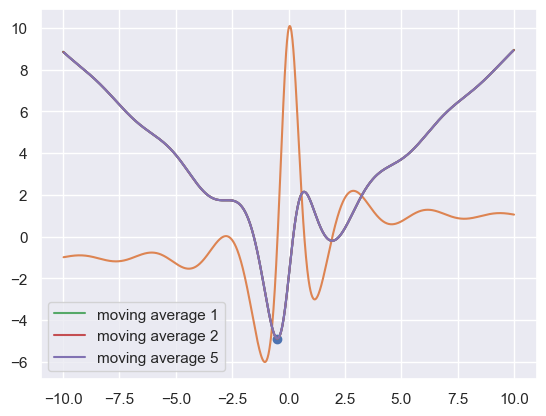

In [16]:
def f(x):
    return (5 * np.sin(2*x) - np.cos(x)**2 - 1 + abs(x**3) - x**2) / (x**2 + 1)

# import sympy
# x = sympy.Symbol('x')
# y = (5 * sympy.sin(2*x) - sympy.cos(x)**2 - 1 + -x**3 - x**2) / (x**2 + 1)
# yprime = y.diff()
# print(yprime)
# print('asdfads', yprime.subs(x, -5).evalf())
# fprime = lambdify(x, yprime, 'numpy')

# print(sympy.Float(yprime.subs(x, -5).evalf()))

x_X = np.linspace(-10,10,1000)
# real_der = [sympy.Float(yprime.subs(x, i).evalf()) for i in list(x_X)]



# print(scipy.misc.derivative(f, -5))
# real_der = [scipy.misc.derivative(f, i) for i in x]

plt.plot(x_X, f(x_X))
# plt.plot(x_X, real_der)
plt.plot(x_X[1:], np.diff(f(x_X)) / np.diff(x_X))

from scipy import optimize
minimum = optimize.minimize(f, x0=0)
plt.scatter(minimum.x, minimum.fun)

def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# они почти совпадают друг с другом
plt.plot(moving_average(x_X, n=1), moving_average(f(x_X), n=1), label='moving average 1')
plt.plot(moving_average(x_X, n=2), moving_average(f(x_X), n=2), label='moving average 2')
plt.plot(moving_average(x_X, n=5), moving_average(f(x_X), n=5), label='moving average 5')
plt.legend()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [19]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 4, 4, 4, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [20]:
def sample_fast(x, c):
    assert len(x) > 0
    
    s = np.sum(x)

    def f11(ranf):
        val = s * ranf
        cusum = np.cumsum(x)
        idx = np.searchsorted(cusum, val)
        return idx

    agr = np.random.random(c)
    g = f11(agr)
    return list(g)

            
print(sample_fast([50, 3, 1, 7, 20], 5))

[4, 0, 3, 1, 4]


In [21]:
_1 = sample([50, 3, 1, 7, 20], 1_000_000)
_2 = sample_fast([50, 3, 1, 7, 20], 1_000_000)

(array([617036.,      0.,  37317.,      0.,      0.,  12351.,      0.,
         86498.,      0., 246798.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

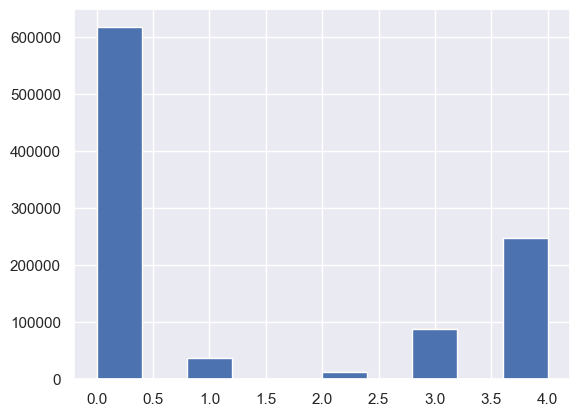

In [22]:
plt.hist(_1)

(array([617235.,      0.,  36490.,      0.,      0.,  12367.,      0.,
         86799.,      0., 247109.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

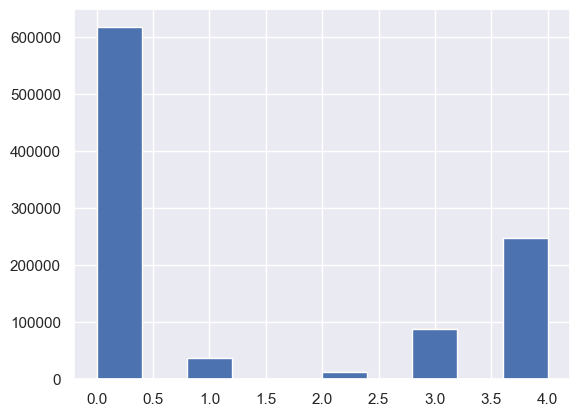

In [23]:
plt.hist(_2)

In [24]:
print('Мат ожидания', np.mean(_1), np.mean(_2))
print('Дисперсия', np.std(_1), np.std(_2))

Мат ожидания 1.308705 1.310057
Дисперсия 1.761040096924258 1.7619999025967623


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [3]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2003

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

211 µs ± 4.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


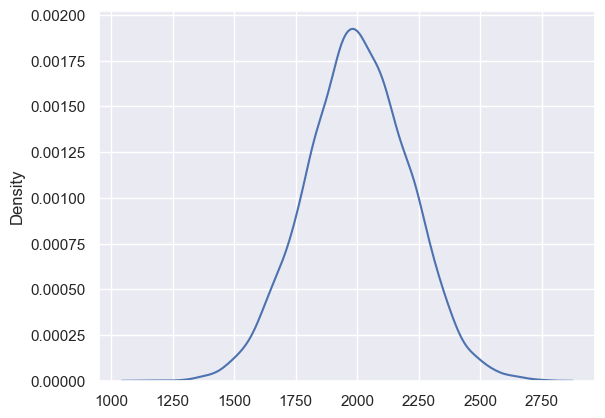

In [25]:
import numpy 

def walk(n: int):
    return np.sum(np.random.choice(np.array([-3, -1, 0, 2, 3]), size=(n, )))

%timeit walk(10_000)

sns.kdeplot([walk(10_000) for _ in range(10_000)])
plt.show()

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [27]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.041429420975518966

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [28]:
from numba import njit

@njit
def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((10000, 10000))

%timeit strange_conv(a)

41.9 ms ± 4.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
# !pip install taichi 
import taichi as ti
ti.init()

@ti.kernel
def strange_conv(a: ti.template()) -> ti.types.float64:
    xx = a.shape[0]
    yy = a.shape[1]

    t = 1.
    for y in range(yy - 5):
        for x in range(xx - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
x = ti.field(float, shape=a.shape)
x.from_numpy(a)

%timeit strange_conv(x)

[Taichi] version 1.2.1, llvm 10.0.0, commit 12ab828a, win, python 3.8.13
[Taichi] Starting on arch=x64
375 ms ± 3.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
